# Import Libraries

In [42]:
# Import core libraries
import pandas as pd
import numpy as np

# Scikit-learn modules
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Overview Dataset

In [43]:
df = pd.read_csv("Weather Data.csv")

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [45]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [46]:
# drop date/time column because it's unique 
df.drop(columns=['Date/Time'], inplace=True)

In [47]:
df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,-1.8,-3.9,86,4,8.0,101.24,Fog
1,-1.8,-3.7,87,4,8.0,101.24,Fog
2,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,-1.5,-3.3,88,7,4.8,101.23,Fog


In [48]:
df['Weather'].value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

### Merged all weather categories into major 4 categories (Clear,Cloudy,Rainy,Snowy)

In [50]:
df["Weather"] = df["Weather"].str.lower()

In [51]:
df["Weather"]

0                        fog
1                        fog
2       freezing drizzle,fog
3       freezing drizzle,fog
4                        fog
                ...         
8779                    snow
8780                    snow
8781                    snow
8782                    snow
8783                    snow
Name: Weather, Length: 8784, dtype: object

In [52]:
# merge all categories into 4 main categories
df["Weather_Simplified"] = df["Weather"].apply(
    lambda x:
    "Clear" if ("clear" in x) else
    "Cloudy" if ("cloud" in x or "fog" in x or "haze" in x) else
    "Rainy" if ("rain" in x or "drizzle" in x or "shower" in x or "thunder" in x) else
    "Snowy" if ("snow" in x or "sleet" in x or "freezing" in x or "ice pellet" in x or "blizzard" in x) else
    "Other"
)

In [53]:
df["Weather_Simplified"].value_counts()

Weather_Simplified
Cloudy    4252
Clear     3432
Rainy      678
Snowy      422
Name: count, dtype: int64

### Checking for duplicate and null values

In [54]:
df.isna().sum()

Temp_C                0
Dew Point Temp_C      0
Rel Hum_%             0
Wind Speed_km/h       0
Visibility_km         0
Press_kPa             0
Weather               0
Weather_Simplified    0
dtype: int64

In [55]:
df.duplicated().sum()

0

In [56]:
df.isnull().sum()

Temp_C                0
Dew Point Temp_C      0
Rel Hum_%             0
Wind Speed_km/h       0
Visibility_km         0
Press_kPa             0
Weather               0
Weather_Simplified    0
dtype: int64

# Separate Features and Encode Target

In [57]:
X = df.drop(["Weather", "Weather_Simplified"], axis=1)
y = df["Weather_Simplified"]

In [58]:
X

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
0,-1.8,-3.9,86,4,8.0,101.24
1,-1.8,-3.7,87,4,8.0,101.24
2,-1.8,-3.4,89,7,4.0,101.26
3,-1.5,-3.2,88,6,4.0,101.27
4,-1.5,-3.3,88,7,4.8,101.23
...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13
8780,0.2,-2.4,83,24,9.7,100.03
8781,-0.5,-1.5,93,28,4.8,99.95
8782,-0.2,-1.8,89,28,9.7,99.91


In [59]:
y

0       Cloudy
1       Cloudy
2       Cloudy
3       Cloudy
4       Cloudy
         ...  
8779     Snowy
8780     Snowy
8781     Snowy
8782     Snowy
8783     Snowy
Name: Weather_Simplified, Length: 8784, dtype: object

In [60]:
le = LabelEncoder()
y = le.fit_transform(y)

In [24]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define Preprocessing Pipelines

In [25]:
# Identify numeric and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [26]:
num_cols

Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa'],
      dtype='object')

In [27]:
cat_cols

Index([], dtype='object')

In [28]:
# Numerical transformer
num_trf = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [29]:
# Categorical transformer
cat_trf = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [30]:
# Combine both transformers
preprocessor = ColumnTransformer(transformers=[
    ('num', num_trf, num_cols),
    ('cat', cat_trf, cat_cols)
])

# Create the Decision Tree Pipeline

In [32]:
# Build full ML pipeline
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [34]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

# Train and Compare Multiple Depths

In [35]:
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, None]
train_scores, test_scores = [], []

for d in depths:
    pipe.set_params(classifier__max_depth=d)
    pipe.fit(X_train, y_train)
    train_scores.append(pipe.score(X_train, y_train))
    test_scores.append(pipe.score(X_test, y_test))

# Store results
results = pd.DataFrame({'max_depth': depths, 'train_acc': train_scores, 'test_acc': test_scores})
results

,max_depth,train_acc,test_acc
0,1.0,0.539917,0.534434
1,2.0,0.577914,0.562891
2,3.0,0.593995,0.565737
3,4.0,0.612922,0.590780
4,5.0,0.640387,0.606716
5,6.0,0.661164,0.603870
6,7.0,0.686210,0.616961
7,8.0,0.714814,0.624360
8,9.0,0.746691,0.627775
9,NaN,1.000000,0.634035


In [85]:

results = []

# Train Decision Tree for different depths
for depth in [1, 2, 3, 4, 5, 6, 7, 8, 9, None]:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Accuracy scores
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Store results
    results.append({
        "max_depth": depth if depth is not None else "None",
        "train_accuracy": train_acc,
        "test_accuracy": test_acc
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display neatly
print(results_df)

  max_depth  train_accuracy  test_accuracy
0         1        0.539917       0.534434
1         2        0.577914       0.562891
2         3        0.593995       0.565737
3         4        0.612922       0.590780
4         5        0.640387       0.606716
5         6        0.661164       0.603870
6         7        0.686210       0.616392
7         8        0.714814       0.623791
8         9        0.746691       0.627775
9      None        1.000000       0.630051


# Visualize Overfitting vs Generalization

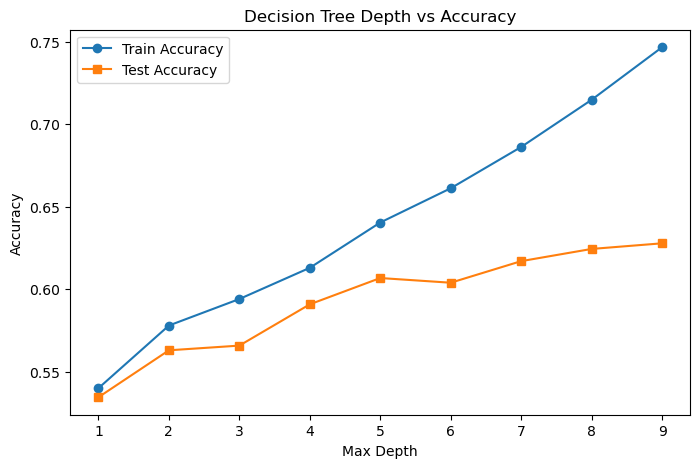

In [36]:
plt.figure(figsize=(8,5))
plt.plot(results['max_depth'], results['train_acc'], marker='o', label='Train Accuracy')
plt.plot(results['max_depth'], results['test_acc'], marker='s', label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Depth vs Accuracy')
plt.legend()
plt.show()

# Grid Search for Best Hyperparameters

In [39]:
param_grid = {
    'classifier__max_depth': [None, 2, 4, 6, 8, 10],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_split': 2}
Best Cross-Validation Accuracy: 0.6419520813190039


# Evaluate Final Model

In [40]:
y_pred = grid_search.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Accuracy: 0.6357427433124644

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.67      0.67       686
           1       0.66      0.64      0.65       851
           2       0.43      0.46      0.44       136
           3       0.60      0.61      0.60        84

    accuracy                           0.64      1757
   macro avg       0.59      0.59      0.59      1757
weighted avg       0.64      0.64      0.64      1757


Confusion Matrix:
 [[460 206  16   4]
 [221 543  64  23]
 [ 11  55  63   7]
 [  4  24   5  51]]


# Observations:

### Lower max_depth → underfitting (both train/test accuracy low)

### Higher max_depth → overfitting (train accuracy 100%, test drops)

## Best performance around medium depth (≈ 4–6)

# Conclusion:
#### Decision Tree with moderate depth generalizes best.
#### Grid Search confirmed optimal parameters balancing bias and variance.